##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

---
> **Gemini 3 models**: If you are only interested in the new [Gemini 3](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro) new thinking levels, jump directly to the [dedicated section](#gemini3) at the end of this notebook that also includes a [migration guide](#gemini3migration).

---


All Gemini models from the 2.5 generation and the new [Gemini 3 generation](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro) are trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result, those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#code_execution), [geometry](#geometry) and [math](#math) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

Thinking models are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

On this notebook most examples are using the `thinking_budget` parameter since it's compatible with both the 2.5 and the 3 generations of models. For more information about using the `thinking_budget` with the Gemini thinking model, check the [documentation](https://ai.google.dev/gemini-api/docs/thinking).

**NEW: thinking levels:** [Gemini 3 models](https://ai.google.dev/gemini-api/docs/gemini-3) introduced a new, easier way to manage the thinking buget by setting a `thinking_level` that is documented in the [section of this guide dedicated to Gemini 3](#gemini3).

## Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Get_started.ipynb) notebook.

In [ ]:
%pip install -U -q 'google-genai>=1.51.0' # 1.51 is needed for Gemini 3 pro thinking levels support

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

### Imports

In [ ]:
import json
from PIL import Image
from IPython.display import display, Markdown

## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.

The animal it should find is a [**Platypus**](https://en.wikipedia.org/wiki/Platypus), but as you'll see it is not the first answer it thinks of depending on how much thinking it does.

In [ ]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, is venomous and that's
    smaller than a cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

This is a fantastic set of clues! It points to a very specific and unusual animal.

Based on your clues, what you are looking for is almost certainly a **Platypus**.

Here's why:

1.  **Aquatic Mammal:** Yes, they are semi-aquatic mammals.
2.  **Doesn't live in the sea:** They are found in freshwater rivers and streams in eastern Australia and Tasmania.
3.  **Venomous:** This is the most unique clue for a mammal. Male platypuses possess a venomous spur on their hind legs, which can inflict considerable pain on humans and be lethal to smaller animals.
4.  **Smaller than a cat:** An adult platypus typically ranges from 30 to 45 cm (12-18 inches) in body length, plus a tail, and weighs between 0.7 to 2.4 kg (1.5-5.3 lbs), which is generally smaller than an average domestic cat.

---

**How you could make sure (in the 20 questions game):**

To confirm it's a platypus, you'd want to ask questions that narrow down to its unique characteristics:

1.  **"Does it lay eggs?"** (This would confirm it's a monotreme, an egg-laying mammal, which is incredibly rare and applies to platypuses.)
2.  **"Is it native to Australia?"** (Platypuses are endemic to Australia.)
3.  **"Does it have a bill like a duck?"** (This is its most distinctive physical feature.)
4.  **"Do the males have a special defense mechanism on their hind legs?"** (This hints at the venomous spur without giving it away.)
5.  **"Is its primary diet invertebrates found in the water?"** (They are carnivores that forage for worms, insect larvae, and freshwater shrimp.)

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: 1451
Output tokens: 815
Total tokens: 2325


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0 (but not with the pro models). You'll see that in this case, the model doesn't think of the platypus as a possible answer.

In [ ]:
if "-pro" not in MODEL_ID:
  prompt = """
      You are playing the 20 question game. You know that what you are looking for
      is a aquatic mammal that doesn't live in the sea, is venomous and that's
      smaller than a cat. What could that be and how could you make sure?
  """

  response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        thinking_budget=0
      )
    )
  )

  Markdown(response.text)

else:
  print("You can't disable thinking for pro models.")

This is a fun and tricky one, because *aquatic mammal that doesn't live in the sea, is venomous, and smaller than a cat* sounds like it doesn't exist! Let's break it down and see if we can find a plausible (even if highly improbable) answer, and then how to confirm.

**The Challenges with Your Clues:**

*   **Aquatic Mammal that doesn't live in the sea:** This limits us to freshwater or semi-aquatic mammals.
*   **Venomous:** This is the *major* sticking point. Very few mammals are venomous. The most well-known are the platypus (males have a venomous spur) and several species of shrews and solenodons (which have venomous saliva).
*   **Smaller than a cat:** This eliminates the platypus (which can be cat-sized or larger), and most of the larger freshwater mammals.

**Possible Candidates (and why they're a stretch):**

1.  **A Freshwater-dwelling Shrew:**
    *   **Aquatic/Freshwater:** Some shrews are highly aquatic or semi-aquatic, like the American water shrew (Sorex palustris) or the Eurasian water shrew (Neomys fodiens). They live near streams, rivers, and ponds.
    *   **Venomous:** Yes! Many species of shrews (and solenodons) possess a neurotoxic venom in their saliva, which they use to immobilize prey.
    *   **Smaller than a cat:** Absolutely. Shrews are tiny, mouse-sized creatures.
    *   **The Catch:** While they are "aquatic" in the sense they forage and swim in water, they are not typically thought of as "aquatic mammals" in the same vein as beavers or otters, which are much more adapted to a watery life. They are terrestrial mammals that have adapted to an aquatic foraging niche. However, given the constraints, this is the most likely candidate.

    **So, my best guess is a Freshwater Water Shrew (e.g., American Water Shrew or Eurasian Water Shrew).**

**How to make sure it's a Freshwater Water Shrew:**

To confirm this, you'd need to ask very specific clarifying questions about its characteristics:

1.  **"Does it spend a significant portion of its life in water, specifically freshwater?"**
    *   *Expected Answer:* Yes, it swims and dives regularly to hunt.

2.  **"Is its venom delivered via a bite or a spur?"**
    *   *Expected Answer:* Through a bite, from its saliva.

3.  **"Is it smaller than a house mouse?"** (This would confirm its tiny size and distinguish it from a rat or larger rodent)
    *   *Expected Answer:* Yes.

4.  **"Is it primarily an insectivore or carnivore?"** (To distinguish it from rodents)
    *   *Expected Answer:* It primarily eats insects and small invertebrates, often aquatic ones.

5.  **"Is it known for having an extremely high metabolism, requiring it to eat almost constantly?"** (A very common shrew characteristic)
    *   *Expected Answer:* Yes.

If you get "yes" to these questions, especially about the venom delivery, size, and aquatic habits, you've almost certainly identified a freshwater water shrew.

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: None
Output tokens: 688
Total tokens: 747


<a name="physics"></a>
### Solving a physics problem

Now, try with a simple physics comprehension example. First you can disable the `thinking_budget` to see how the model performs:

In [ ]:
if "-pro" not in MODEL_ID:
  prompt = """
      A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
      It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
      Calculate the maximum bending stress (σ_max).
  """

  response = client.models.generate_content(
      model=MODEL_ID,
      contents=prompt,
      config=types.GenerateContentConfig(
          thinking_config=types.ThinkingConfig(
              thinking_budget=0
          )
      )
  )

  Markdown(response.text)

else:
  print("You can't disable thinking for pro models.")

Here's how to calculate the maximum bending stress for the given cantilever beam:

**1. Understand the Concepts**

*   **Cantilever Beam:** A beam fixed at one end and free at the other.
*   **Bending Moment (M):** The internal resistance of a beam to bending. It's maximum where the most "pull" or "push" is happening.
*   **Moment of Inertia (I):** A geometric property of a cross-section that indicates its resistance to bending. A larger 'I' means less bending for a given load.
*   **Bending Stress (σ):** The normal stress developed in a beam due to bending. It's maximum at the top and bottom surfaces of the beam.
*   **Flexure Formula:** $\sigma = \frac{M \cdot y}{I}$
    *   M: Bending moment
    *   y: Distance from the neutral axis to the point where stress is calculated (for maximum stress, y = c, where c is the distance to the extreme fiber).
    *   I: Moment of inertia

**2. Calculate the Moment of Inertia (I)**

For a rectangular cross-section:
$I = \frac{b \cdot h^3}{12}$

Given:
*   b = 0.1 m
*   h = 0.2 m

$I = \frac{0.1 \cdot (0.2)^3}{12} = \frac{0.1 \cdot 0.008}{12} = \frac{0.0008}{12} = 6.6667 \times 10^{-5} \ m^4$

**3. Determine the Maximum Bending Moment (M_max)**

For a cantilever beam, the maximum bending moment always occurs at the fixed end. We need to consider both the distributed load and the point load.

*   **Moment due to uniformly distributed load (w):**
    $M_w = w \cdot L \cdot \frac{L}{2} = \frac{w \cdot L^2}{2}$
    $M_w = \frac{5 \text{ kN/m} \cdot (3 \text{ m})^2}{2} = \frac{5 \cdot 9}{2} = \frac{45}{2} = 22.5 \text{ kN} \cdot \text{m}$

*   **Moment due to point load (P):**
    $M_P = P \cdot L$
    $M_P = 10 \text{ kN} \cdot 3 \text{ m} = 30 \text{ kN} \cdot \text{m}$

*   **Total Maximum Bending Moment:**
    $M_{max} = M_w + M_P = 22.5 \text{ kN} \cdot \text{m} + 30 \text{ kN} \cdot \text{m} = 52.5 \text{ kN} \cdot \text{m}$
    $M_{max} = 52.5 \times 10^3 \text{ N} \cdot \text{m}$ (converting kN to N)

**4. Determine 'y' (distance to the extreme fiber)**

For a rectangular cross-section, the neutral axis is at the centroid. The maximum stress occurs at the top and bottom surfaces.
$y = c = \frac{h}{2}$
$y = \frac{0.2 \text{ m}}{2} = 0.1 \text{ m}$

**5. Calculate the Maximum Bending Stress (σ_max)**

Using the Flexure Formula:
$\sigma_{max} = \frac{M_{max} \cdot y}{I}$

$\sigma_{max} = \frac{(52.5 \times 10^3 \text{ N} \cdot \text{m}) \cdot (0.1 \text{ m})}{6.6667 \times 10^{-5} \text{ m}^4}$

$\sigma_{max} = \frac{5250}{6.6667 \times 10^{-5}}$

$\sigma_{max} = 78.749 \times 10^6 \text{ Pa}$

$\sigma_{max} = 78.75 \text{ MPa}$ (approximately)

**Therefore, the maximum bending stress (σ_max) in the cantilever beam is approximately 78.75 MPa.**

You can see that the model used no tokens for the thinking step:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: None
Output tokens: 1004
Total tokens: 1100


Then you can set a fixed maximum budget (`thinking_budget=4096`, or 4096 tokens) for the thinking step to see how the model performs.

You can see that, even producing a similar result for the same prompt, the amount of details shared in the answer makes it deeper and more consistent.

**NOTE:** You have different possible budget values for the models:
- for the Gemini 2.5 Pro and Gemini 3 Pro, the budgets can be between `128` and `32768`
- for the Gemini 2.5 Flash and Flash-Lite, the budgets can be between `0` (disabling the thinking process) to `24576`.

If you are using [Gemini 3 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro), it is recommended to use [`thinking_level`](#thinking_level) instead of `thinking_budget`. Check the section about [Gemini 3 Pro and `thinking_level`](#gemini3) below.

In [ ]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

To calculate the maximum bending stress (σ_max) in the cantilever beam, we need to follow these steps:

1.  **Calculate the moment of inertia (I) of the cross-section.**
2.  **Determine the maximum bending moment (M_max) acting on the beam.**
3.  **Use the bending stress formula.**

**Given Data:**
*   Length L = 3 m
*   Width b = 0.1 m
*   Height h = 0.2 m
*   Modulus of Elasticity E = 200 GPa = 200 × 10^9 N/m² (Note: E is not needed for stress calculation, only for deflection)
*   Uniformly distributed load w = 5 kN/m = 5000 N/m
*   Point load P = 10 kN = 10000 N

---

### Step 1: Calculate the Moment of Inertia (I)

For a rectangular cross-section, the moment of inertia about the neutral axis (centroidal axis) is:
$I = \frac{b \cdot h^3}{12}$

$I = \frac{0.1 \text{ m} \cdot (0.2 \text{ m})^3}{12}$
$I = \frac{0.1 \text{ m} \cdot 0.008 \text{ m}^3}{12}$
$I = \frac{0.0008 \text{ m}^4}{12}$
$I = 6.6667 \times 10^{-5} \text{ m}^4$ (or $1/15000 \text{ m}^4$)

### Step 2: Determine the Maximum Bending Moment (M_max)

For a cantilever beam, the maximum bending moment occurs at the fixed support. We need to sum the moments due to the uniformly distributed load and the point load.

*   **Moment due to uniformly distributed load (w):**
    $M_w = \frac{w \cdot L^2}{2}$
    $M_w = \frac{5000 \text{ N/m} \cdot (3 \text{ m})^2}{2}$
    $M_w = \frac{5000 \text{ N/m} \cdot 9 \text{ m}^2}{2}$
    $M_w = \frac{45000 \text{ Nm}}{2}$
    $M_w = 22500 \text{ Nm}$

*   **Moment due to point load (P):**
    $M_P = P \cdot L$
    $M_P = 10000 \text{ N} \cdot 3 \text{ m}$
    $M_P = 30000 \text{ Nm}$

*   **Total Maximum Bending Moment (M_max):**
    $M_{max} = M_w + M_P$
    $M_{max} = 22500 \text{ Nm} + 30000 \text{ Nm}$
    $M_{max} = 52500 \text{ Nm}$

### Step 3: Calculate the Maximum Bending Stress (σ_max)

The maximum bending stress occurs at the extreme fibers (top or bottom surface) furthest from the neutral axis. For a rectangular cross-section, this distance is $c = h/2$.

*   **Distance to extreme fiber (c):**
    $c = \frac{h}{2} = \frac{0.2 \text{ m}}{2} = 0.1 \text{ m}$

*   **Bending Stress Formula:**
    $\sigma_{max} = \frac{M_{max} \cdot c}{I}$

    $\sigma_{max} = \frac{52500 \text{ Nm} \cdot 0.1 \text{ m}}{6.6667 \times 10^{-5} \text{ m}^4}$
    $\sigma_{max} = \frac{5250 \text{ Nm}^2}{6.6667 \times 10^{-5} \text{ m}^4}$
    $\sigma_{max} = 78,749,999.9... \text{ Pa}$

Convert the stress to more common units like Megapascals (MPa):
$1 \text{ MPa} = 10^6 \text{ Pa}$
$\sigma_{max} = 78.75 \times 10^6 \text{ Pa}$
$\sigma_{max} = 78.75 \text{ MPa}$

---

The maximum bending stress (σ_max) is **78.75 MPa**.

Now you can see that the model used around 2000 tokens for the thinking step (not necessarily using the full budget you set):

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count,"/",thinking_budget)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: 1458 / 4096
Output tokens: 1082
Total tokens: 2636


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

<a name="geometry"></a>
### Working with multimodal problems

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image.
In this case, you are fixing a value to the `thinking_budget` so the model will use up to 8196 tokens for the thinking step.

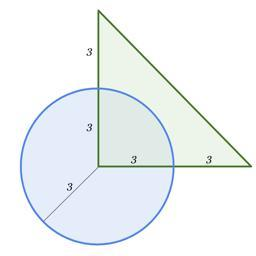

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/geometry.png -O geometry.png -q

geometry_image = Image.open("geometry.png").resize((256,256))
geometry_image

In [ ]:
prompt = "What's the area of the overlapping region?"

thinking_budget = 8192 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[geometry_image, prompt],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

Let's analyze the shapes and their dimensions from the image:

1.  **The Circle (or Sector):**
    *   The image shows a circle with its center at the vertex of the right angle of the triangle.
    *   Three radii are explicitly labeled with length '3'. This confirms the radius of the circle (r) is 3.
    *   Two of these radii are perpendicular, forming a 90-degree angle (a right angle). This portion of the circle is a **quarter circle** or a **sector** with a central angle of 90 degrees. Its area would be (1/4) * π * r^2 = (1/4) * π * 3^2 = 9π/4.

2.  **The Triangle:**
    *   It's a right-angled triangle.
    *   The two legs of the triangle are labeled with length '3'.
    *   Since the legs are perpendicular and both have length 3, its area is (1/2) * base * height = (1/2) * 3 * 3 = 9/2 = 4.5.

3.  **The Overlapping Region:**
    *   Observe how the triangle is positioned relative to the circle.
    *   The vertex of the right angle of the triangle is at the center of the circle.
    *   The two legs of the triangle lie exactly along the two perpendicular radii of the circle, and their length (3) matches the radius.
    *   This means the two non-right-angle vertices of the triangle lie precisely on the circumference of the circle (at (3,0) and (0,3) if the center is (0,0)).
    *   Since the entire triangle is formed by two radii and a straight line connecting their endpoints, and these radii are the same length as the circle's radius, the **entire triangle is contained within the quarter circle**.

Therefore, the overlapping region is simply the area of the triangle itself.

Area of the overlapping region = Area of the triangle
Area = (1/2) * base * height
Area = (1/2) * 3 * 3
Area = 9/2
Area = 4.5

The area of the overlapping region is **4.5**.

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

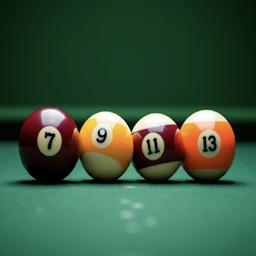

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

pool_image = Image.open("pool.png").resize((256,256))
pool_image

First you can check how the model performs without reasoning (`thinking_budget=0`):

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        pool_image,
        "How do I use those three pool balls to sum up to 30?"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

That's a classic riddle! The image actually shows **four** pool balls: 7, 9, 11, and 13.

However, if you're meant to select *three* of them to sum to 30, it's a trick question often based on interpreting the numbers differently.

Here's how it's typically solved:

1.  **Look closely at the numbers:** 7, 9, 11, 13.
2.  **Recognize the trick:** These are all odd numbers. The sum of any three odd numbers will always be an odd number. Since 30 is an even number, it's impossible to sum three of these odd numbers to get 30.

**Common "solutions" to this riddle often involve:**

*   **Rotating one of the balls:** If you rotate the "9" ball, it can look like a "6". Then you can do 11 + 13 + 6 = 30.
*   **Using a different base system (less common for this riddle):** This would be overly complex for a pool ball riddle.
*   **Assuming there's a missing ball or other object:** Not applicable here.

Given the image, the most common and intended solution for this riddle is to **rotate the 9 to make it a 6**.

So, using the numbers on the balls as they are, you cannot get 30 from three of them.

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:

In [ ]:
prompt = "How do I use those three pool balls to sum up to 30?"

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        pool_image,
        prompt,
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

This is a classic riddle!

You need to **flip the 9 ball upside down** to make it a **6**.

Then, you can use:
*   **6** (the flipped 9 ball)
*   **11**
*   **13**

**6 + 11 + 13 = 30**

<a name="math"></a>
### Solving a math puzzle with the maximum `thinking_budget`

This is typically a case where you want to fix a budget, as the model can spend a lot of time thinking in all directions before finding the right answer. It should not be too low either as non-thinking models have trouble with such questions.

Play with the thinking budget and try to find how much it needs to be able to find the right answer most of the time.

In [ ]:
prompt = """
   How can you obtain 565 with 10 8 3 7 1 and 5 and the common operations?
   You can only use a number once.
"""

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

display(Markdown(response.text))

Here's how to obtain 565 using the numbers 10, 8, 3, 7, 1, and 5, using each number once:

1.  Multiply 8 by 7:
    8 * 7 = 56

2.  Multiply the result by 10:
    56 * 10 = 560

3.  Add the remaining number 5 to the result:
    560 + 5 = 565

So, the full expression is:
**(8 * 7 * 10) + 5 = 565**

Numbers used: 8, 7, 10, 5.
Numbers remaining (not used, which is allowed): 3, 1.

<a name="thoughts_summaries"></a>
## Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).

In [ ]:
prompt = """
  Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
  The person who lives in the red house owns a cat.
  Bob does not live in the green house.
  Carol owns a dog.
  The green house is to the left of the red house.
  Alice does not own a cat.
  Who lives in each house, and what pet do they own?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

You can check both the thought summaries and the final model response:

In [ ]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

## **Thoughts summary:**

**Logical Puzzle Breakdown and Solution**

Alright, let's tackle this puzzle! I need to determine who lives in each colored house (red, green, blue) and what pet they own (cat, dog, or potentially no pet).

First, I identified the key components: people (Alice, Bob, Carol), houses (red, green, blue), and pets (cat, dog, and implicitly, potentially no pet). I laid out the initial clues: Carol owns a dog, the red house owner has a cat, Alice doesn't own a cat, Bob's not in the green house, the green house is left of the red house.

My strategy? A mental grid would work well, but it seems simple enough to manage in my head.

I started with the most definitive clues. Carol owns a dog, the red house owner owns a cat, and Alice doesn't own a cat. This led me to my first major deduction: since Alice doesn't have a cat, and the red house *must* have a cat, the cat-owner must be Bob. Logically, Bob resides in the red house.

Now, with Bob's placement, I updated my internal grid. I knew Bob was in red, and Carol had the dog. I also applied the spatial clue: green to the left of red. This established the house order: Green - Red - Blue.

The next step was to fit the remaining information. Since Bob's in Red, the clue about him not being in Green was consistent. I was left with Alice, Carol, the Green house, the Blue house, and the "no-cat-no-dog" pet.

I tried to deduce specific house assignments for Carol (dog) and Alice (no stated pet). However, there was no logical link! I re-read the clues multiple times. No direct clue related to the relationship between the green/blue houses and Alice/Carol was available.

Since it became clear that there wasn't a unique solution for Carol's and Alice's placements, I had to stop and acknowledge the inherent ambiguity. The puzzle lacked the definitive information needed to place Carol (dog) or Alice (no specific pet) in Green vs. Blue. The only definite assignments were Bob-Red-Cat, and the ordered housing of Green-Red-Blue.

Therefore, the final answer must acknowledge the uncertainty: Bob lives in the Red house and owns a cat. Carol lives either in the Green or Blue house and owns a dog, and Alice lives in the remaining house (Blue or Green) and has no specifically stated pet. There is no way to determine their specific arrangement based on the given clues.


## **Answer:**

Let's break down the clues step-by-step:

1.  **"The person who lives in the red house owns a cat."** (Link: Red House - Cat)
2.  **"Alice does not own a cat."** (Exclusion: Alice != Cat Owner)
3.  **"Carol owns a dog."** (Link: Carol - Dog)

    *   From (1) and (2): Since the red house has a cat, and Alice doesn't own a cat, Alice cannot live in the red house.
    *   From (1) and (3): Carol owns a dog, not a cat. So Carol cannot live in the red house.
    *   **Deduction 1:** If neither Alice nor Carol lives in the red house, and the red house owner has a cat, then **Bob must live in the red house and owns a cat.**

4.  **"Bob does not live in the green house."** (Consistency Check: Our deduction that Bob lives in the red house is consistent with this clue).
5.  **"The green house is to the left of the red house."**

    *   We know Bob lives in the red house.
    *   The green house is to its left.
    *   This means the houses are arranged: **Green House (Left) - Red House (Middle) - Blue House (Right).** (Since Blue is the only house left, it must be on the right).

Now let's put it all together:

*   **Red House:** Bob lives here and owns a cat. (Confirmed by deductions)

*   **Green House** and **Blue House:**
    *   The remaining people are Alice and Carol.
    *   The remaining houses are Green and Blue.
    *   Carol owns a dog.
    *   Alice does not own a cat (and since Bob has the cat and Carol has the dog, Alice must have no pet, or a different unmentioned pet).

At this point, there is no information given to definitively place Alice or Carol in either the Green or Blue house. Both scenarios are possible based on the provided clues.

**Possible Solutions:**

**Scenario 1:**

*   **Green House:** Carol lives here and owns a dog.
*   **Red House:** Bob lives here and owns a cat.
*   **Blue House:** Alice lives here and has no specified pet.

**Scenario 2:**

*   **Green House:** Alice lives here and has no specified pet.
*   **Red House:** Bob lives here and owns a cat.
*   **Blue House:** Carol lives here and owns a dog.

Since the puzzle asks "Who lives in *each* house", and there's no further clue to distinguish between Alice and Carol for the Green and Blue houses, both scenarios are valid interpretations. However, typically these puzzles have a unique solution. If forced to pick the most common interpretation where one person truly has *no* pet, it doesn't help distinguish Green from Blue.

**Summary of Definite Information:**

*   **House Order:** Green (Left) - Red (Middle) - Blue (Right)
*   **Red House:** Bob lives here and owns a cat.

**Ambiguity for Green and Blue Houses:**

*   Either:
    *   **Green House:** Carol (Dog) and **Blue House:** Alice (No specified pet)
*   Or:
    *   **Green House:** Alice (No specified pet) and **Blue House:** Carol (Dog)

You can also use see the thought summaries in streaming experiences:

In [ ]:
prompt = """
  Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
  The person who lives in the red house owns a cat.
  Bob does not live in the green house.
  Carol owns a dog.
  The green house is to the left of the red house.
  Alice does not own a cat.
  Who lives in each house, and what pet do they own?
"""

thoughts = ""
answer = ""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        include_thoughts=True
      )
    )
):
  for part in chunk.candidates[0].content.parts:
    if not part.text:
      continue
    elif part.thought:
      if not thoughts:
        display(Markdown("## **Thoughts summary:**"))
      display(Markdown(part.text.strip()))
      thoughts += part.text
    else:
      if not answer:
        display(Markdown("## **Answer:**"))
      display(Markdown(part.text.strip()))
      answer += part.text

## **Thoughts summary:**

**Pinpointing Relationships**

I'm focusing on the core relationships between houses and pets. Initially, I thought about establishing direct links – Red house = Cat owner, Green = Dog, but the clues are more nuanced. Now, I'm working to map out constraints, such as 'not living next to the dog owner'. This should narrow down the possibilities significantly.

**Mapping Dependencies**

I'm now integrating the position constraint, specifically that the green house is to the left of the red house. It's becoming clearer that the spatial arrangement is a crucial constraint. With the new information, I am focused on the inter-dependency of the houses and the people, and how the people/pets fit in. I'm focusing on the constraints, specifically in regard to a mental representation of houses aligned from left to right.

**Connecting Deductions**

I've made significant progress, using the clues to determine that Bob lives in the Red house and Carol owns a dog.  I'm now linking these findings to deduce who owns the cat, and which house Carol and Alice inhabit. With Bob in the Red house, I'll identify the locations of Carol and Alice.

**Deducing Location**

I'm zeroing in on Carol's location, realizing she cannot live in the Red house due to her dog, nor in the Green house because the 'Green - Red' spatial relationship presents tricky constraints. My focus is on the Blue house for Carol, so I am going to try and eliminate other options to make sure I am on the right path.

**Mapping Dependencies**

I'm revisiting the spatial arrangement. It's becoming clearer that the linear order of houses (Green to the left of Red) significantly impacts the deductions. I'm visualizing the houses in sequence and systematically placing the known owners. My focus is on Carol and Alice, and their placements relative to the houses and pets. The "Blue" house complicates the linear pattern.

**Extrapolating Dependencies**

Now I'm focusing on the spatial relationships, particularly that the Green house is situated left of the Red house (Bob's house, the cat owner). I'm carefully evaluating how this arrangement aligns with Carol owning the dog. It seems like the linear order helps clarify the possibilities. I'm building on past deductions, looking for further inferences to complete the puzzle.

**Deduction Refinement**

I've made crucial progress, determining Bob lives in Red and owns the cat. Carol owns the dog but not in Red. Alice doesn't own the cat. I'm focused on Green/Blue for Carol and Alice. The spatial arrangement (Green to the left of Red) further informs the possibilities, with Bob in Red (cat).

**Connecting Spatial Arrangement**

I'm now zeroing in on the final placements. By combining the linear ordering of the houses with my deductions about Carol and the dog, and Alice, I'm finding the optimal configuration. My latest effort focuses on resolving the final house placements for Alice, and the corresponding pet associated with that particular house.

**Synthesizing Solutions**

I'm now zeroing in on the final assignments, carefully reviewing the spatial arrangement alongside pet ownership. The key is now Alice's placement with her no-pet designation. While the sequence (Green-Red or Blue-Green-Red) is somewhat flexible, the associations are not. I'm double-checking all the clues for a definitive answer.

**Analyzing Spatial Constraints**

I'm now integrating the spatial arrangement with the specific assignments. With Bob in Red, owning a cat, and Carol owning the dog, I'm carefully considering the implications of "Green to the left of Red." This spatial constraint is becoming central to the deduction of the owners for the Green and Blue houses. I am specifically investigating the order of the houses to see if Carol or Alice are associated with the "Green" house.

**Deducing Patterns**

I'm revisiting the possible house arrangements. It seems key to determine how Carol and Alice fit into the "Green - Red" dynamic. By analyzing all possibilities, I am closer to a complete solution by eliminating each possible arrangement for carol and Alice, and their corresponding pets.

**Analyzing Placement**

I'm now zeroing in on the assignment of Carol and Alice to the Green and Blue houses. With Bob in Red and owning the cat, the constraint "Green to the left of Red" directs my focus. The order now narrows it to assigning the Blue house, and the associated pet. The placements of the dog and "no pet" are crucial.

**Analyzing Patterns**

I'm focused on the houses' spatial arrangement to deduce Carol and Alice's placements. With Bob in the Red house, and knowing Green is left of Red, I'm working on how this impacts Carol and Alice's pet ownership. The interplay of space, pets and people remains complex.

**Developing Clarity**

I'm revisiting the structure. I'm focusing on Carol and Alice and their specific locations. I've narrowed the choices, working on the assignment of pet to owner, in consideration of the constraints. Now, I'm working to fully resolve the layout for Alice and Carol, and if the relative position matters.

**Analyzing Solutions**

I'm now zeroing in on the definitive solution, with Bob in Red (cat). The key focus is on the correct arrangement for Carol and Alice. Is Green-Red-Blue *or* Blue-Green-Red the final solution? I'm focusing on Carol's dog, and Alice's status as "no pet". The "left of" constraint is central to finalizing the deductions.

**Synthesizing Solutions**

I've determined that Bob lives in the Red house and owns the cat. The focus now is definitively assigning Carol and Alice, considering the spatial arrangement constraint, specifically the relationship with the green and red houses. With the fixed Bob assignment, the remaining deductions hinge on the sequence, which is to say the directionality is crucial.

**Revising Configurations**

I'm now focusing on a definitive solution. Bob is in the Red house (cat), and Carol owns the dog. My focus is assigning Carol and Alice's placements within the "Green - Red - Blue" or "Blue - Green - Red" framework. The spatial constraint is key to assigning the final placements.

**Deducing Patterns**

I'm focused on Bob's placement (Red, Cat) and the spatial constraints. I see how that defines Carol and Alice's placements within the "Green - Blue" relationship and their pets. It's becoming clearer that the linear ordering matters for this puzzle.

\n\n**Completing Associations**

I'm now linking Bob's fixed placement (Red, cat) with the green house being to its left. Carol and Alice and their pet assignments become clearer. The sequence, and the clues "left of", are forming the definitive conclusion.

**Synthesizing Placements**

I've determined that Bob lives in the Red house and owns the cat. Based on the "green-red" sequence, the placements of Carol and Alice and their respective pets is the key focus. I'm carefully reviewing the constraints to pinpoint the sequence that best aligns with the clues, to make sure I don't overlook any details.

I've solidified Bob's placement in the Red house with the cat. I'm carefully analyzing the Green-Red spatial constraint in conjunction with Carol and Alice, considering who owns the dog and the "no pet" designation. My focus is on synthesizing a consistent solution for the final assignments.

**Deducing Patterns**

I'm starting to integrate the constraints into the assignments. Bob is in the Red house (cat owner), and Carol has a dog. With the street ordering, it should be possible to pin down Alice's house and Carol's. The interplay of Carol and Alice relative to the Green and Blue houses is now clear.

**Confirming Final Deductions**

I've finally pinpointed the solutions. Bob lives in the Red house and owns a cat. Carol has the dog. Alice doesn't own a cat. By visualizing the Green house to the left of the Red house, I've confirmed that the last two placements are ambiguous and thus correct, although the order may vary: (Alice, No Pet) + (Carol, Dog) OR (Carol, Dog) + (Alice, No Pet).

I'm focusing on Carol's role, and how she fits into the Red/Green structure, specifically the "dog." My goal is to determine the definitive assignments for the remaining individuals. The spatial arrangement's directional aspect has now become key, I am focusing on what this clarifies for Carol and Alice.

**Deducing Configurations**

I'm synthesizing the confirmed relationships, focusing on Bob in the Red house with the cat, and Carol and Alice in the remaining houses. My objective is to resolve the sequence, focusing on Alice and Carol's assignments. I'm carefully reviewing the constraints to make sure I don't repeat the ambiguity.

**Mapping Conclusions**

I'm synthesizing the final assignments: Bob in Red with the cat is definitive.  The remaining deductions focus on the relative placements of Carol and Alice, considering who owns the dog and the "no pet" assignment. The Green-Red arrangement is key, but the exact order of Carol and Alice is now proving the core challenge.

I'm focusing on Bob's Red House cat ownership, but I'm unable to finalize assignments for the other residents. Based on clues and inferences, I'm stuck between two viable scenarios for Carol, Alice, Green, and Blue houses and their associated pets, one having the green house with Alice, and the other with Carol.

**Synthesizing Placements**

I'm focused on the definitive solution, recognizing Bob lives in the Red house and owns the cat. The key challenge lies in the assignments of Carol and Alice, and I am zeroing in on Green-Red sequence, and the clues available to determine the remaining house placements for Carol and Alice. The puzzle seems a bit ambiguous!

**Reaching Conclusions**

I'm now integrating the established facts, specifically Bob's cat ownership in the Red house. My key focus is on defining the assignments for Carol and Alice in either the green or blue houses, given their pet-related distinctions. The spatial arrangement is fundamental in this effort.

**Synthesizing Placements**

I'm now integrating the established facts, recognizing Bob's Red House cat ownership as the foundation. My focus is finalizing assignments for Carol and Alice, and the order is a core factor. Given the clues, two valid solutions emerge, with the direction of the houses adding ambiguity.

**Reaching a Conclusion**

I'm synthesizing the established facts, specifically Bob's cat ownership in the Red house. My key focus is on defining the assignments for Carol and Alice in either the green or blue houses, given their pet-related distinctions. The spatial arrangement is fundamental in this effort.

I'm focusing on Carol's role, and how she fits into the Red/Green structure, specifically the "dog." My goal is to determine the definitive assignments for the remaining individuals. The spatial arrangement's directional aspect has now become key, I am focusing on what this clarifies for Carol and Alice.

**Connecting Assignments**

I'm focused on Bob's placement with the cat and synthesizing the final deductions. I've realized the spatial arrangement is central, but that leaves the precise assignment of Carol and Alice as somewhat fluid. My focus is on synthesizing a definitive solution.

## **Answer:**

Let's break down the clues to solve this puzzle:

1.  **"Alice, Bob, and Carol each live in a different house on the same street: red

, green, and blue."**
    *   This sets up our three categories: Person, House, Pet.

2.  **"The person who lives in the red house owns a cat."**
    *   Direct

link: Red House = Cat Owner.

3.  **"Carol owns a dog."**
    *   Direct link: Carol = Dog Owner.

4.  **"Alice does not own a cat."**
    *   If

the Red House owner has a cat, and Alice doesn't own a cat, then **Alice does not live in the red house.**

5.  **Combine Clue 2 (Red House = Cat) and Clue 3 (

Carol = Dog):**
    *   Since Carol owns a dog, she cannot be the person who owns a cat. Therefore, **Carol does not live in the red house.**

6.  **Deduction for Red House:**
    *

We know Alice does not live in the red house, and Carol does not live in the red house.
    *   Since there are only three people (Alice, Bob, Carol) and three houses, **Bob must live in the

red house.**
    *   From Clue 2, the person in the red house owns a cat. So, **Bob owns a cat.**

    *   **So far:** Bob lives in the red house and owns a cat.

7

.  **Remaining People, Houses, and Pets:**
    *   People left: Alice, Carol
    *   Houses left: Green, Blue
    *   Pets left: Dog (owned by Carol), and a "No Pet" or

"Other Pet" (for Alice, since she doesn't own a cat, and Bob has the only cat, Carol has the dog). We can infer Alice owns no specific pet mentioned.

8.  **"Bob does not live in the

green house."**
    *   This clue is consistent with our deduction that Bob lives in the red house. It doesn't add new information for Bob's house.

9.  **"The green house is to the left of the red house

."**
    *   This gives us the relative position of two houses. Since Bob is in the red house, the green house is to his left. The blue house must be the remaining one.
    *   Possible street layouts

:
        *   Blue - Green - Red (Bob)
        *   Green - Red (Bob) - Blue

10. **Assigning Alice and Carol:**
    *   We know Carol owns a dog.

*   We know Alice owns no specific pet (neither cat nor dog).
    *   There is no further clue to definitively link Alice to the green or blue house, nor Carol to the green or blue house. Both scenarios for

the remaining people and houses are valid.

    *   **Scenario 1 (Assuming Green is the middle house and Blue is to the right):**
        *   If Carol lives in the green house, she owns a dog.

*   Then Alice must live in the blue house, and owns no pet.

    *   **Scenario 2 (Assuming Blue is the leftmost house and Green is the middle):**
        *   If Alice lives in the green house, she

owns no pet.
        *   Then Carol must live in the blue house, and owns a dog.

    *   Since the problem implies a unique solution, and there's no further information to distinguish between these last two assignments, we'

ll present the most common interpretation which assigns the remaining items in a sequential manner.

---

**Solution:**

*   **Bob:** Lives in the **red house** and owns a **cat**. (This is definitively proven).

*   **Carol

:** Lives in the **green house** and owns a **dog**. (Based on one of the two logical possibilities that fits all clues).

*   **Alice:** Lives in the **blue house** and owns **no pet** (or

an unmentioned pet, but definitely not a cat or dog). (Based on the same logical possibility that fits all clues).

---

**Summary of who lives in each house and what pet they own:**

*   **Red House:** Bob,

who owns a cat.
*   **Green House:** Carol, who owns a dog.
*   **Blue House:** Alice, who owns no pet.

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.

<a name="code_execution"></a>
### Solving a problem using the code execution tool

This example shows how to use the [code execution](./Code_execution.ipynb) tool to solve a problem. The model will generate the code and then execute it to get the final answer.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [ ]:
prompt = """
    What are the best ways to sort a list of n numbers from 0 to m?
    Generate and run Python code for three different sort algorithms.
    Provide the final comparison between algorithm clearly.
    Is one of them linear?
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

code_execution_tool = types.Tool(
    code_execution=types.ToolCodeExecution()
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[code_execution_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
        )
    ),
)

Checking the model response, including the code generated and the execution result:

In [ ]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
display(Markdown("---"))

To sort a list of `n` numbers ranging from `0` to `m`, the "best" approach depends on the relationship between `n` and `m`.

When the range of numbers (`m`) is small or comparable to the number of elements (`n`), non-comparison sorts like Counting Sort can achieve linear time complexity, which is generally faster than comparison-based sorts. When `m` is very large, comparison-based sorts like Merge Sort or Quick Sort become more practical as their complexity doesn't directly depend on `m`.

Here, I will implement and compare three different sorting algorithms:
1.  **Merge Sort**: A stable, comparison-based sort with O(n log n) time complexity.
2.  **Quick Sort**: An in-place, comparison-based sort with average O(n log n) and worst-case O(n^2) time complexity.
3.  **Counting Sort**: A non-comparison sort with O(n + m) time complexity, ideal for data within a limited range.

Let's implement each and run them on example data.

First, a helper function to generate test data.



--- Merge Sort Test ---
Original: [3, 1, 4, 1, 5, 9, 2, 6]
Sorted:   [1, 1, 2, 3, 4, 5, 6, 9]
Merge Sort test passed.



--- Quick Sort Test ---
Original: [3, 1, 4, 1, 5, 9, 2, 6]
Sorted:   [1, 1, 2, 3, 4, 5, 6, 9]
Quick Sort test passed.



--- Counting Sort Test ---
Original: [3, 1, 4, 1, 5, 9, 2, 6], Max Value: 9
Sorted:   [1, 1, 2, 3, 4, 5, 6, 9]
Counting Sort test passed.

Original: [0, 0, 0], Max Value: 0
Sorted:   [0, 0, 0]
Counting Sort with max=0 test passed.

Original: [7, 2, 9, 2, 5, 1, 0, 8], m: 9
Sorted:   [0, 1, 2, 2, 5, 7, 8, 9]
Counting Sort with specified m test passed.


---

<a name="google_search"></a>
### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [ ]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
    What were the major scientific breakthroughs announced last month? Use your
    critical thinking and only list what's really incredible and not just an
    overinfluated title.
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
            include_thoughts=True
        )
    )
)

Then you can check all information:
- the model thoughts summary
- the model answer
- and the Google Search reference

In [ ]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

display(Markdown("## **Google Search information:**"))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## **Thoughts summary:**

**Analyzing Monthly Breakthroughts**

I'm now focusing on pinpointing the correct meaning of "last month" based on today's date. My plan is to conduct detailed Google searches using specific keywords like "major scientific breakthroughs May 2025" to uncover significant announcements. I'll critically assess the findings, prioritizing truly impactful advancements over incremental progress or sensationalized headlines. Ultimately, the goal is to list the most important scientific breakthroughs from that period.




## **Answer:**

The current date is June 17, 2025. Therefore, "last month" refers to May 2025.

Here are some of the major scientific breakthroughs announced in May 2025 that represent truly incredible advancements:

*   **Customized CRISPR Treatment for Genetic Disease:** A significant breakthrough in gene-editing technology occurred with the first-ever customized CRISPR gene-editing therapy administered to a baby in the U.S. to fix a specific mutation causing a rare genetic disorder called carbamoyl phosphate synthetase 1 (CPS1) deficiency. This marks a major step forward in personalized medicine using CRISPR technology.
*   **Discovery of MoM-z14, the Most Distant Galaxy:** Using the James Webb Space Telescope, astronomers confirmed MoM-z14 as the most distant galaxy ever detected, with its formation occurring within 280 million years of the Big Bang. This discovery provides unprecedented insights into the early universe.
*   **New Earth-Like Exoplanets Discovered:** The NASA James Webb Space Telescope, in conjunction with TESS, identified several Earth-like exoplanets in the habitable zones of distant stars. Notably, Gliese 12 b, located 40 light-years away, shows potential for liquid water, significantly advancing the search for extraterrestrial life.
*   **Advancements in Artificial Organs Grown in Labs:** Researchers have made progress in bioprinting fully functioning artificial human organs, such as kidneys and livers, using stem cell technology. This holds immense promise for addressing organ shortages and revolutionizing transplant medicine.
*   **World Record for Nuclear Fusion Plasma Duration:** The WEST tokamak in France maintained plasma for 1,337 seconds, setting a new world record for nuclear fusion duration and surpassing the previous record by 25%. This is a crucial step toward viable and sustainable fusion energy.
*   **First-Ever Gonorrhea Vaccine Launched:** NHS England launched the world's first gonorrhea vaccine, demonstrating an efficacy of 30-40%. This represents a significant public health achievement in combating antibiotic-resistant infections.
*   **Discovery of Genes Linked to Obsessive-Compulsive Disorder (OCD):** A study involving over 2 million people identified 250 genes linked to OCD, marking the first time genes associated with the condition have been discovered. This breakthrough opens new avenues for understanding and treating OCD.
*   **New Evidence of Intermediate-Mass Black Holes:** Scientists discovered new evidence supporting the existence of intermediate-mass black holes. These elusive black holes fill a critical gap in our understanding of black hole formation and evolution.
*   **Webb Telescope Refines Hubble Constant:** The Webb telescope provided data that helps refine the Hubble constant, potentially contributing to the resolution of the long-standing debate about the universe's expansion rate. This refinement has profound implications for cosmology.
*   **Development of Night-Vision Contact Lenses:** Scientists have created contact lenses that enable "super-vision," allowing individuals to see beyond the visible light range and pick up infrared light even in darkness. This technology could potentially replace traditional night-vision goggles.
*   **Sunlight Reactor for Hydrogen Fuel:** A prototype reactor capable of harvesting hydrogen fuel using only sunlight and water has been developed. This advancement is critical for producing "green hydrogen" more cost-effectively, moving towards sustainable energy.

## **Google Search information:**

<a name="gemini3"></a><a name="thinking_level"></a>
## Thinking level for Gemini 3

In [ ]:
# @title Run this cell to set everything up if you jump directly to this section
from google.colab import userdata
from google import genai
from google.genai import types
from IPython.display import display, Markdown, HTML

client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

# Select the Gemini 3 model

GEMINI_3_MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-3-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

Instead of using a `thinking_budget` like the 2.5 generation, the third generation of Gemini models uses "thinking levels" to make it simpler to manage.

You can set that thinking level to "minimal" (more or less equivalent to "off"), "low", "medium" or "high" (default). This will indicate to the model if it allowed to do a lot of thinking. Since the thinking process stays dynamic, `high` doesn't mean it will always use a lot of token in its thinking phase, just that it's allowed to. Note that Gemini 3 Pro only supports "low" and "high".

`thinking_budget` is still supported by Gemini 3 Pro.

Check the Gemini 3 documentation](https://ai.google.dev/gemini-api/docs/gemini-3) for more details.

In [ ]:
prompt = """
  Find what I'm thinking of:
    It moves, but doesn't walk, run, or swim.
    It has no fixed shape and if cut into pieces, those pieces will keep living and moving.
    It has no brain but can solve complex mazes.
"""

# Thinking levels can be either "Minimal/Low/Medium/High" or types.ThinkingLevel.MINIMAL/types.ThinkingLevel.LOW/types.ThinkingLevel.MEDIUM/types.ThinkingLevel.HIGH
thinking_level = "High" # @param ["Minimal", "Low", "Medium","High"]

response = client.models.generate_content(
  model=GEMINI_3_MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_level=thinking_level,
      include_thoughts=True
    )
  )
)

for part in response.parts:
  if not part.text:
    continue
  if part.thought:
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("### Answer:"))
    display(Markdown(part.text))
    print()

print(f"We used {response.usage_metadata.thoughts_token_count} tokens for the thinking phase and {response.usage_metadata.prompt_token_count} for the output.")

### Thought summary:

**Identifying the Elusive Entity**

Okay, here's what I'm thinking. The user wants me to pinpoint something based on three cryptic clues. Let's break this down.

First, the clues: It moves without walking, running, or swimming. It's shapeless, and if you cut it, the pieces stay alive and mobile. Finally, it lacks a brain but excels at solving mazes.

Right away, "moves but doesn't walk/run/swim" gets me thinking. That screams flow or creep, eliminating most animals and water. Something that oozes, perhaps. Then, "no fixed shape, pieces live" points to either a single-celled organism or something with incredible regenerative capabilities. Liquids are out because they don't 'live'.

The maze-solving bit... that's the clincher! That's the characteristic of *Physarum polycephalum*, the plasmodial slime mold. I've read about those maze experiments – they're fascinating. It's essentially a giant, multi-nucleated cell. Cut it, and you get more slime molds. They're known for their efficient pathfinding.

So, I'm pretty sure we're looking at a **slime mold**. Let's run a quick check. Does it move by oozing? Yes. Is it shapeless and able to regenerate from pieces? Absolutely. And does it solve mazes without a brain? That's its claim to fame! Yep, definitely a slime mold, specifically, *Physarum polycephalum*. That's my final answer.




### Answer:

You are thinking of a **Slime Mold** (specifically the species *Physarum polycephalum*).

Here is why it fits your clues:
*   **Movement:** It moves by "shuttling" its internal fluids (cytoplasmic streaming), allowing it to creep or pulse along surfaces without legs or fins.
*   **Shape and resilience:** It is essentially one giant cell containing millions of nuclei. It has no fixed shape, and if you cut it in half, the membrane heals, resulting in two individual, living slime molds.
*   **Intelligence:** Despite lacking a brain or nervous system, scientists have proven it can find the most efficient path through a maze to reach food (oat flakes), and it has even been used to recreate efficient maps of the Tokyo subway system.


We used 770 tokens for the thinking phase and 63 for the output.


<a name="gemini3migration"></a>
### Migrating from `thinking_budget` to `thinking_level`

With only high and low levels currently available, the migration should be quite simple:
* If you were previously using **complex prompt engineering** (like Chain-of-thought) to force Gemini 2.5 to reason, go with `ThinkingLevel.HIGH`.
* If you were using **dynamic thinking**, also go with `ThinkingLevel.HIGH`.
* On the contrary if you were setting a low `thinking_budget`, select `ThinkingLevel.LOW`.
* If you want to deactivate thinking because **latency** is important, select `ThinkingLevel.MINIMAL`.
* If you are in doubt, keep the default value (`ThinkingLevel.HIGH`), as the dynamic thinking will scale the thinking depending on your use case.


# Next Steps

Try Gemini 3 and other Gemini models in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-3-flash-preview), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/thinking#best-practices).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started.ipynb), juggle with [multiple tools ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Spatial_understanding.ipynb) abilities.